# __Incremental Capstone - Week 12__

## Problem Statement
Boston Dental Clinic is an old ClickO customer who wishes to use Aura’s ML/DL capabilities to retain old patients and provide better service. The clinic is looking at cleaning its older X-Ray Database by denoising poorer X-Rays. A market research analysis has found that providing better quality historical X-rays is a sure-shot way of retaining customers.


**AutoEncoder**

*An autoencoder is a special type of neural network that is trained to copy its input to its output. Learns to compress the data while minimizing the reconstruction error.*


**Dataset Description**

This dataset consists of anonymized and de-identified panoramic dental X-rays of 116 patients, taken at Noor Medical Imaging Center, Qom, Iran. The subjects cover a wide range of dental conditions from healthy, to partial and complete edentulous cases. The mandibles of all cases are manually segmented by two dentists.

The dataset is saved in compressed NumPy format which when loaded using numpy.load will give you x_train, y_train, x_test and y_test NumPy arrays respectively.

__Task:  Build an autoencoder model to improve the clarity of dental X-rays (denoise
the X-rays.) using the dental panoramic dataset.__

__Task A:__
1. Load the Dental-Panaromic-Autoencoder.npz dataset using NumPy.load.
Note: NPZ is a file format by NumPy that provides storage of array data using
gzip compression.
2. Extract x_train, y_train, x_test and y_test NumPy arrays from the dataset
3. A noisy version of the data set will be created by applying random noise to
each image.
- With a noise factor of 0.2, add noise to the signal by multiplying the
noise factor and random values from a normal distribution.
- Hint: noise_factor = 0.2
- x_train_noisy = x_train + noise_factor *
tf.random.normal(shape=x_train.shape)
- x_test_noisy = x_test + noise_factor *
tf.random.normal(shape=x_test.shape)
- Clip the signal values between 0 and 1.
4. Plot the first 5 X-ray images from the original images. (x_train)
5. Plot the first 5 X-ray images from noise images. (x_train_noisy)
6. Train an autoencoder using the noisy image as the input and the original
image as the destination. The images are shaped 256x256 in RGB scale
- Create a Denoise class inherited from Keras Model
- The class has an encoder member variable of below layers: <br>
Input Layer of shape 256*256*3 <br>
Conv2D with 64 filters, kernel size 3,3, activation relu and same
padding and strides 2 <br>
Conv2D with 32 filters, kernel size 3,3, activation relu and same
padding and strides 2 <br>
- The class has a decoder member variable of below layers: <br>
Conv2DTranspose with 32 filters, kernel size 3,3, activation relu
and same padding and stride 2 <br>
Conv2DTranspose with 64 filters, kernel size 3,3, activation relu
and same padding and stride 2 <br>
Conv2D with 1 filter, kernel size 3,3, activation sigmoid and
same padding.

7. Create a call member function to the class which will pass the input to the
encoder member function and the output of the encoder to the decoder
member function.
8. Initialize the autoencoder object of the class Denoise
9. Compile the autoencoder with adam optimizer and MeanSquaredError as
loss
10. Train the autoencoder with X as x_train_noisy and Y as x_train for 50 epochs
and validation data as x_test_noisy and x_test
11. Plot training and validation MAE and loss against epochs

__Task B:__
1. Evaluate the autoencoder model on x_test.
- Pass the x_test into the encoder
- Pass the encoded images into the decoder. This step gives the
decoded images that are reconstructed from the original.

2. Plot both the first 10 noisy images (x_test_noisy) and images without noise
produced by the autoencoder. Check how well the AutoEncoder model has
done the job with denoising.


## Import libraries

In [1]:
# !pip install tensorflow==2.17.0 scikeras==0.13.0 keras==3.2.0

In [2]:
import os

# Disable oneDNN optimizations to avoid potential minor numerical differences caused by floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import os
from tensorflow.keras.models import Sequential

## Task A

__1. Load the Dental-Panaromic-Autoencoder.npz dataset using NumPy.load.
Note: NPZ is a file format by NumPy that provides storage of array data using
gzip compression.__

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
x = np.load('./data/Dental-Panaromic-Autoencoder.npz', allow_pickle=True)
print(x.files)

['x_train', 'y_train', 'x_test', 'y_test']


__2. Extract x_train, y_train, x_test and y_test NumPy arrays from the dataset.__

In [6]:
x_train = x['x_train']
x_test = x['x_test']

__3. A noisy version of the data set will be created by applying random noise to
each image.__
- With a noise factor of 0.2, add noise to the signal by multiplying the
noise factor and random values from a normal distribution.
- Hint: noise_factor = 0.2
- x_train_noisy = x_train + noise_factor *
tf.random.normal(shape=x_train.shape)
- x_test_noisy = x_test + noise_factor *
tf.random.normal(shape=x_test.shape)
- Clip the signal values between 0 and 1.

In [7]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

We will train an automatic encoder to remove noise from images. A noisy version
of the data set will be created by applying random noise to each image.

__4. Plot the first 5 X-ray images from the original images. (x_train)__

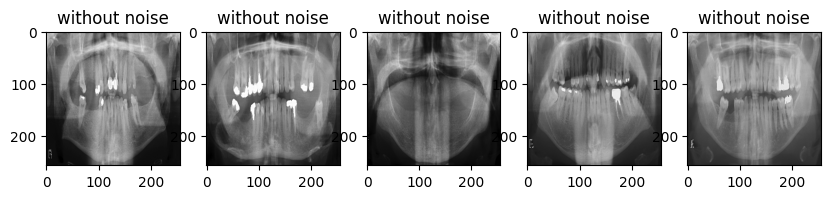

In [8]:
n = 5
plt.figure (figsize=(10,2))
for i in range(n):
  ax = plt.subplot(1 , n, i + 1)
  plt.title ("without noise")
  plt.imshow (tf.squeeze(x_train[i]))
  plt.gray()

plt.show()

__5. Plot the first 5 X-ray images from noise images. (x_train_noisy).__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6736465..1.6736841].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.75901383..1.66834].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7516125..1.5564569].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6721157..1.534124].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5902996..1.6650064].


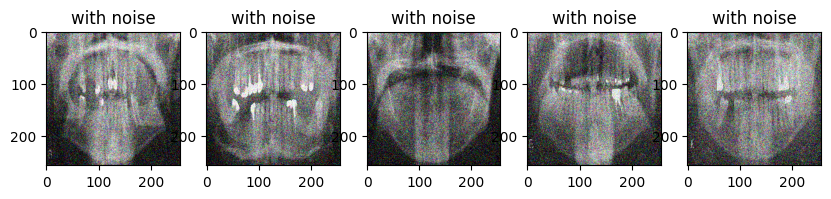

In [9]:
n = 5
plt.figure (figsize=(10,2))
for i in range(n):
  ax = plt.subplot(1 , n, i + 1)
  plt.title ("with noise")
  plt.imshow (tf.squeeze(x_train_noisy[i]))
  plt.gray()
plt.show()

The plot shows the noise added to the dental x rays. The random noise can be
seen as more disturbed pixels on the original x rays.

__6. Train an autoencoder using the noisy image as the input and the original
image as the destination. The images are shaped 256x256 in RGB scale.__
- Create a Denoise class inherited from Keras Model
- The class has an encoder member variable of below layers: <br>
Input Layer of shape 256*256*3 <br>
Conv2D with 64 filters, kernel size 3,3, activation relu and same
padding and strides 2 <br>
Conv2D with 32 filters, kernel size 3,3, activation relu and same
padding and strides 2 <br>
- The class has a decoder member variable of below layers: <br>
Conv2DTranspose with 32 filters, kernel size 3,3, activation relu
and same padding and stride 2 <br>
Conv2DTranspose with 64 filters, kernel size 3,3, activation relu
and same padding and stride 2 <br>
Conv2D with 1 filter, kernel size 3,3, activation sigmoid and
same padding.

In [10]:
input_shape = (256,256,3)

__7. Create a call member function to the class which will pass the input to the
encoder member function and the output of the encoder to the decoder
member function.__

In [11]:
from keras import layers


class Denoise(tf.keras.models.Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(filters=64, kernel_size=(3, 3),
                      activation='relu', padding="same", strides=2),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", strides=2)])
    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(filters=32, kernel_size=(
            3, 3), activation='relu', padding="same", strides=2),
        layers.Conv2DTranspose(filters=64, kernel_size=(
            3, 3), activation='relu', padding="same", strides=2),
        layers.Conv2D(filters=1, kernel_size=(3, 3),
                      activation='sigmoid', padding="same")
    ])

  def call(self, x):
      return self.decoder(self.encoder(x))

__8. Initialize the autoencoder object of the class Denoise.__

In [12]:
autoencoder = Denoise()

__9. Compile the autoencoder with adam optimizer and MeanSquaredError as
loss.__

In [13]:
from sklearn import metrics
autoencoder.compile(optimizer='adam',loss=keras.losses.MeanSquaredError(),metrics=["mae"])

__10. Train the autoencoder with X as x_train_noisy and Y as x_train for 50 epochs
and validation data as x_test_noisy and x_test.__

In [14]:
history =autoencoder.fit(x_train_noisy, x_train,epochs =50,
                          shuffle=True,validation_data=(x_test_noisy, x_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step - loss: 0.0532 - mae: 0.1836 - val_loss: 0.0516 - val_mae: 0.1814
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 591ms/step - loss: 0.0506 - mae: 0.1795 - val_loss: 0.0494 - val_mae: 0.1783
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 592ms/step - loss: 0.0492 - mae: 0.1779 - val_loss: 0.0454 - val_mae: 0.1719
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 587ms/step - loss: 0.0436 - mae: 0.1687 - val_loss: 0.0386 - val_mae: 0.1600
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 600ms/step - loss: 0.0355 - mae: 0.1527 - val_loss: 0.0286 - val_mae: 0.1368
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 600ms/step - loss: 0.0256 - mae: 0.1275 - val_loss: 0.0192 - val_mae: 0.1035
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step - loss: 0.0170 - mae: 0.0945 - val_loss: 0.0143 - val_mae: 0.0813
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 608ms/step - loss: 0.0132 - mae: 0.0782 - val_loss: 0.0111 - val_mae: 0.0763
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 608ms/step - loss: 0.0098 - mae: 

__11. Plot training and validation MAE and loss against epochs.__

In [15]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.plot(history .history['mae'] )
  plt.plot(history .history['val_mae'])
  plt.title ('Model MAE')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='upper left')
  plt.show()
  # summarize history for Loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title ('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='upper left')
  plt.show()

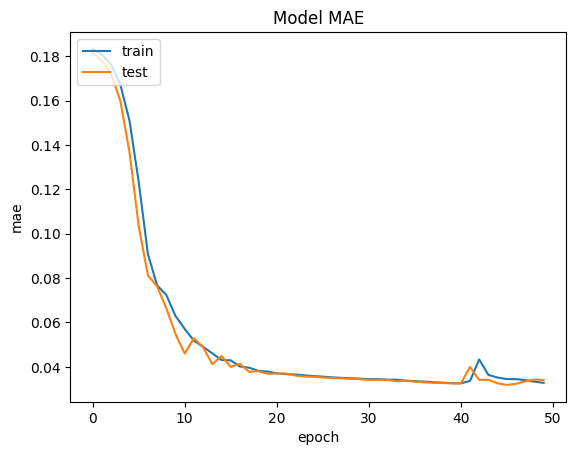

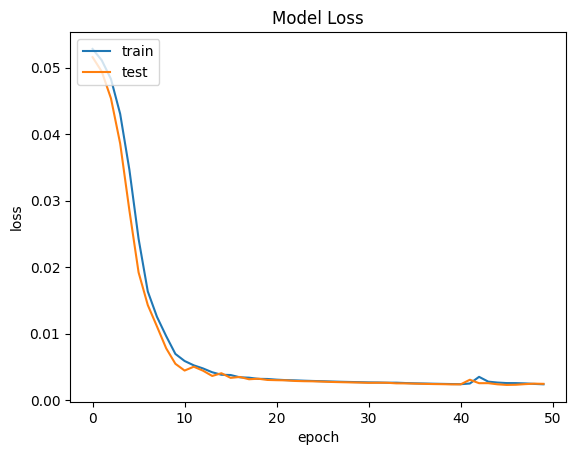

In [16]:
plot_history(history)

__Observations:__
- The Autoencoder model is able to do a smooth training
- Training and validation losses are smooth and continuously decreasing
- Training and validation Mean Absolute Error are smooth and continuously
decreasing

## Task B:

__1. Evaluate the autoencoder model on x_test.__
- Pass the x_test into the encoder
- Pass the encoded images into the decoder. This step gives the
decoded images that are reconstructed from the original.

In [17]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

__Observations:__
- The noisy test images are first passed through the enocoder network and
then to the decoder to get the decoded images which are the called as
recreated images.
- This step gives the decoded images that are reconstructed from the noisy.
- The encoder network takes the feature data and encodes it to fit into the
latent space. This encoded data is used by the decoder to convert back to
the feature data. In an encoder, what the model learns is how to encode
the data efficiently so that the decoder can convert it back to the original.
Therefore, the essential part of autoencoder training is to generate an
optimized latent space.

__2. Plot both the first 10 noisy images (x_test_noisy) and images without noise
produced by the autoencoder. Check how well the AutoEncoder model has
done the job with denoising.__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.67498785..1.7490343].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.79053336..1.635939].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6976282..1.6067537].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.77339655..1.5974238].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.71832466..1.5903352].


<Figure size 640x480 with 0 Axes>

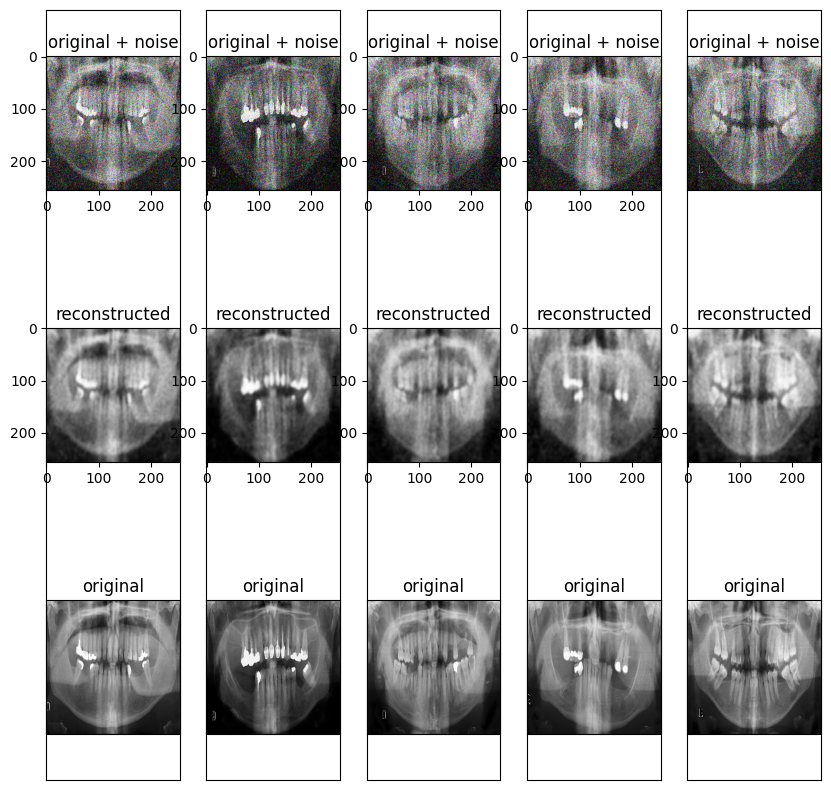

In [18]:
n = 5
#plt.figure(figsize=(80,28))
plt.gray()

fig, axes = plt.subplots(nrows=1,ncols=n,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})
for i in range (n):
  #display original+ noise
  bx = plt.subplot(3, n,i + 1)
  plt.title("original + noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
for i in range (n):
  # display reconstruction
  ex = plt.subplot(3, n, i + n + 1)
  plt.title( "reconstructed")
  plt.imshow(tf.squeeze (decoded_imgs[i]))
  bx.get_xaxis().set_visible(False)
  bx.get_yaxis().set_visible(False)
for i in range (n):
  # display original
  ax = plt. subplot (3, n, i + 2*n + 1)
  plt.title ("original")
  plt.imshow(tf.squeeze (x_test[i]))
  ax.get_xaxis().set_visible (False)
  ax.get_yaxis().set_visible (False)

plt.show()

__Observation:__
- The recreated images are similar to original images
- The noisy pixels are no longer visible
- The continuously falling MAE scores while training shows how well the
model is able to recreate the images

## __Conclusion:__
- The idea of image noise reduction is to train a model with noisy data as the
inputs, and their respective clear data the outputs.
- An Autoencoder can clean very noisy images, which it has never seen before (we
used the test dataset).
- There are obviously some non-recovered distortions. Yet, if you consider how
deformed the noisy images, we can say that our model is pretty successful in
recovering the distorted images.
- The encoder network down samples the data into lower dimensions.
- The decoder network reconstructs the original data from the lower dimension
representation. The lower dimension (i.e, output of encoder network)
representation is usually known as latent space representation.
- We can consider extending this autoencoder and embed it into a photo
enhancement app, which can increase the clarity and crispness of the photos.